In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import Model
from keras.applications import VGG16
from matplotlib import pyplot as plt
import keras.callbacks
import cv2

from skimage.morphology import remove_small_objects

In [2]:
# SET GPU
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
IMG_SIZE = 224
model = keras.models.load_model("Model road segment")

In [4]:
def read_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img)
    return img.numpy()

def resize_and_rescale(img):
    img = img.astype(np.float16)
    img = img / 255.0
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img.numpy()

def process_after_predict(segment):
    segment = (segment.astype(np.bool8)).reshape((IMG_SIZE, IMG_SIZE))
    segment = remove_small_objects(segment, 100)

    segment = segment == 0
    segment = remove_small_objects(segment, 100)
    segment = segment == 0
    segment = (segment.astype(np.float32)).reshape((IMG_SIZE, IMG_SIZE, 1))
    return segment

def display_result_image(img, segment):
    zero_array = np.zeros_like(segment)
    segment_img = np.dstack((zero_array, segment, zero_array)) # Green
    result_img = cv2.addWeighted(src1= img, alpha= 1.0, src2= segment_img, beta= 0.5, gamma= 0)
    plt.imshow(result_img)
    plt.show()

1/1 [==============================] - 11s 11s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


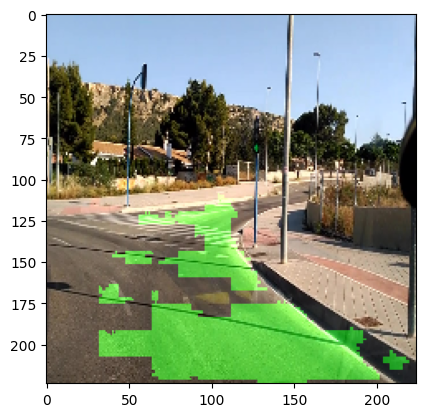

In [5]:
path = "test/trafficlight01_0890.jpg"
img = read_img(path)
img = resize_and_rescale(img)
segment = model.predict(np.expand_dims(img, 0))[0]>0.5
segment = process_after_predict(segment)
display_result_image(img, segment)